In [1]:
from ObjectiveFunction import ObjectiveFunction
from EvolutionaryStrategy import EvolutionaryStrategy
import numpy as np
import json
import matplotlib.pyplot as plt

# Schwefel Function

In [7]:
of = ObjectiveFunction("schwefel_function",2,[-500,500])
of.evaluate(np.array([420.9687,420.9687]))

2.545567497236334e-05

In [9]:
of = ObjectiveFunction("schwefel_function",6,[-500,500])
of.evaluate(np.array([420.9687,420.9687,420.9687,420.9687,420.9687,420.9687]))

7.636702503077686e-05

In [3]:
def plot_fitness_performance_per_run(run_num, avg_fitness_per_run, best_fitness_per_run):
    plt.plot(range(1, run_num + 1), avg_fitness_per_run, label='Average Fitness', color='blue')
    plt.plot(range(1, run_num + 1), best_fitness_per_run, label='best Fitness', color='green')        
    plt.xlabel('Run')
    plt.ylabel('Fitness')
    plt.title('Per Run')
    plt.legend()
    plt.show()

In [10]:
def run_es(config, run_num = 1):
    avg_fitness_per_run = []
    best_fitness_per_run = []
    min_fitness_per_run = []
    for i in range(0,run_num):
        print("-----------------------------------------------------")
        print("this is run number: ",i+1)
        es = EvolutionaryStrategy(config)
        min_value, min_chromosome, last_generation, average_fitness_values, best_fitness_values, fitness_std = es.run()
        print("solution fitness: ", min_value)
        print("solution: ", min_chromosome)
        es.plot_fitness_performance(last_generation, average_fitness_values, best_fitness_values)
        es.plot_diversity(fitness_std,last_generation)
        avg_fitness_per_run.append(np.mean(average_fitness_values))
        best_fitness_per_run.append(np.mean(best_fitness_values))
    plot_fitness_performance_per_run(run_num, avg_fitness_per_run, best_fitness_per_run)

### n = 3

-----------------------------------------------------
this is run number:  1
Convergence Speed at Generation based on avg-fitness-values 802: 1.5724452345721114
Convergence Speed at Generation based on best-fitness-values 802: 0.40942306069199846
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874685674044, 420.96874620638386, 420.9687461582725]


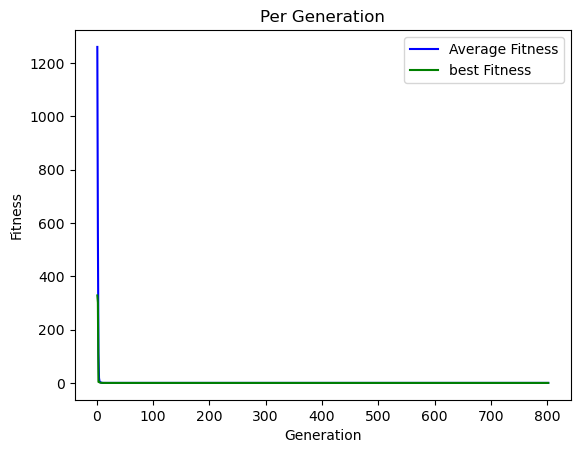

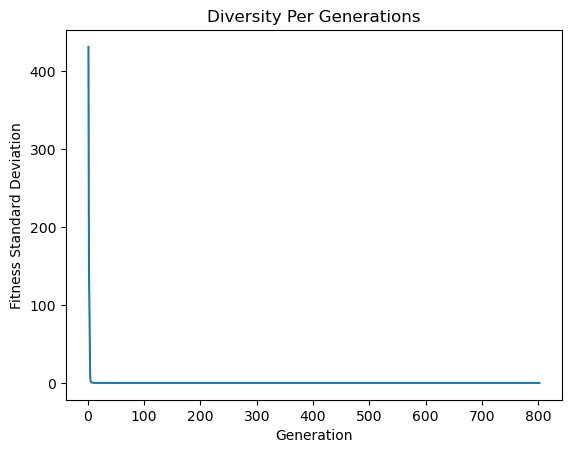

-----------------------------------------------------
this is run number:  2
Convergence Speed at Generation based on avg-fitness-values 1000: 1.2458472527501003
Convergence Speed at Generation based on best-fitness-values 1000: 0.33447175795653994
solution fitness:  118.43837279713671
solution fitness:  [-302.5249356968373, 420.96874712779334, 420.96874652120357]


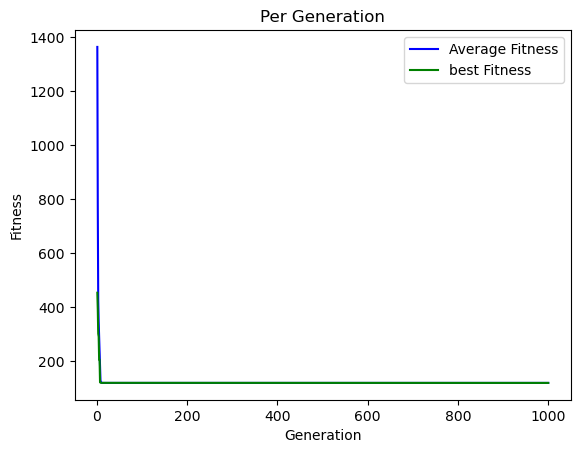

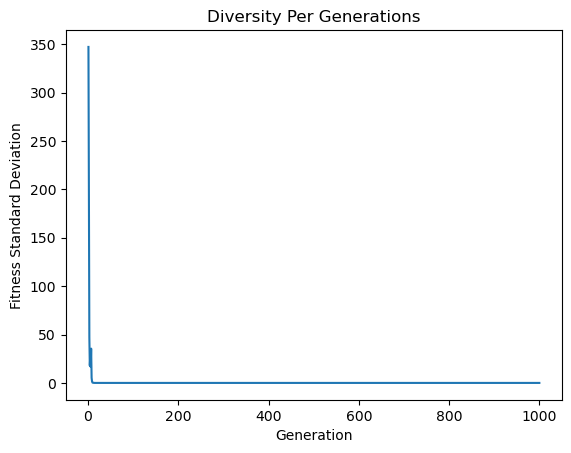

-----------------------------------------------------
this is run number:  3
Convergence Speed at Generation based on avg-fitness-values 830: 1.6864732588235287
Convergence Speed at Generation based on best-fitness-values 830: 0.9079895593639368
solution fitness:  3.818269851763034e-05
solution fitness:  [420.9687466591746, 420.9687464426354, 420.9687460945249]


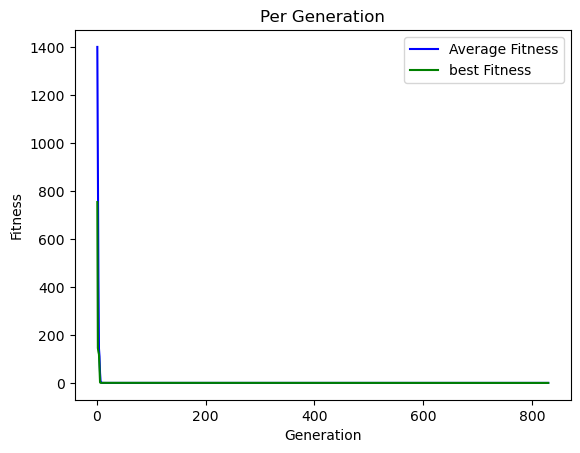

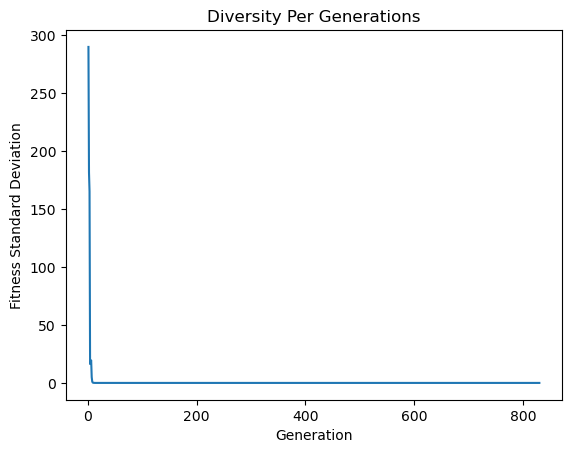

-----------------------------------------------------
this is run number:  4
Convergence Speed at Generation based on avg-fitness-values 730: 1.6327154777337054
Convergence Speed at Generation based on best-fitness-values 730: 0.7140255598110599
solution fitness:  3.818269874500402e-05
solution fitness:  [420.9687462642667, 420.96874611540227, 420.9687466975966]


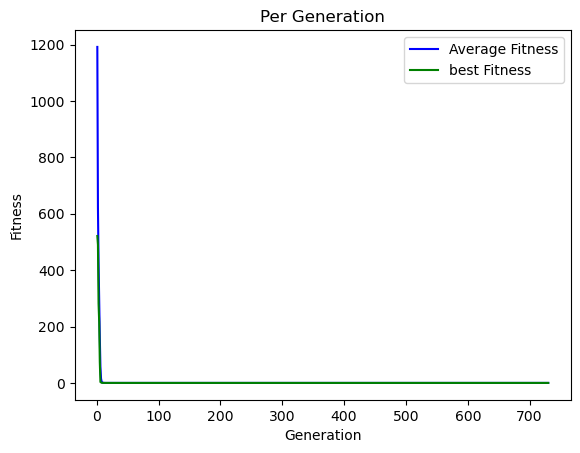

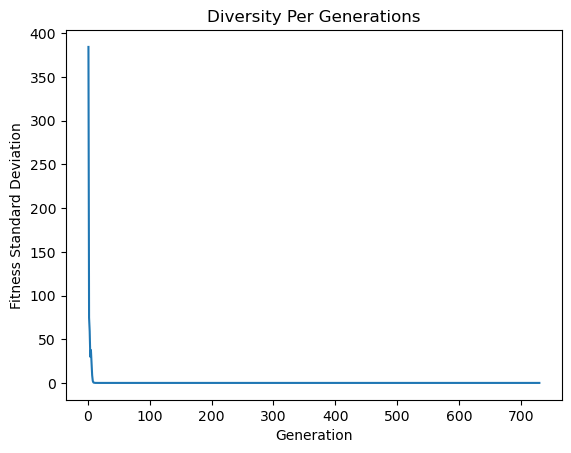

-----------------------------------------------------
this is run number:  5
Convergence Speed at Generation based on avg-fitness-values 784: 1.6425586871086377
Convergence Speed at Generation based on best-fitness-values 784: 0.7513764465763624
solution fitness:  118.43837279713671
solution fitness:  [420.9687464227492, 420.96874644730667, -302.52493719361246]


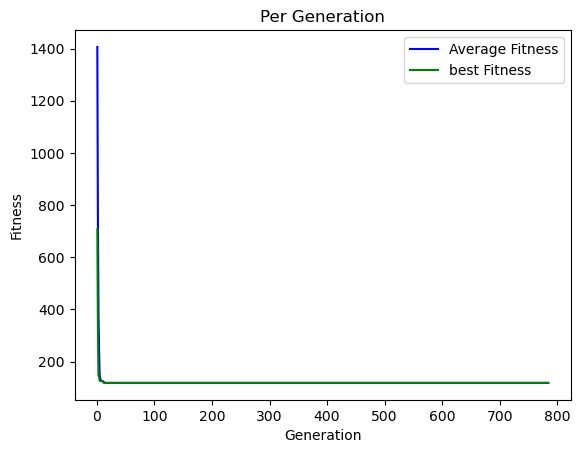

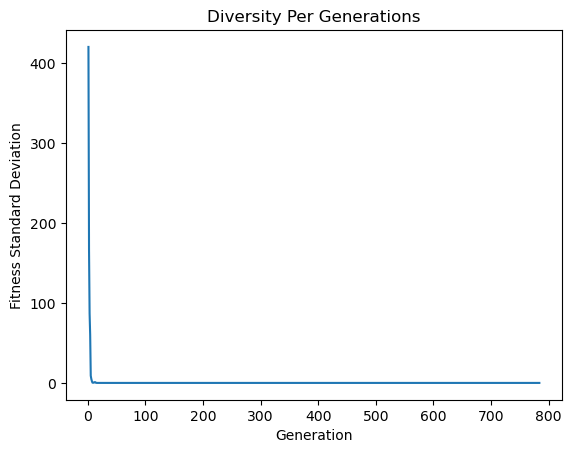

-----------------------------------------------------
this is run number:  6
Convergence Speed at Generation based on avg-fitness-values 817: 1.5280603004907534
Convergence Speed at Generation based on best-fitness-values 817: 0.5502600331832439
solution fitness:  3.818269874500402e-05
solution fitness:  [420.9687468016338, 420.968746572768, 420.96874583317856]


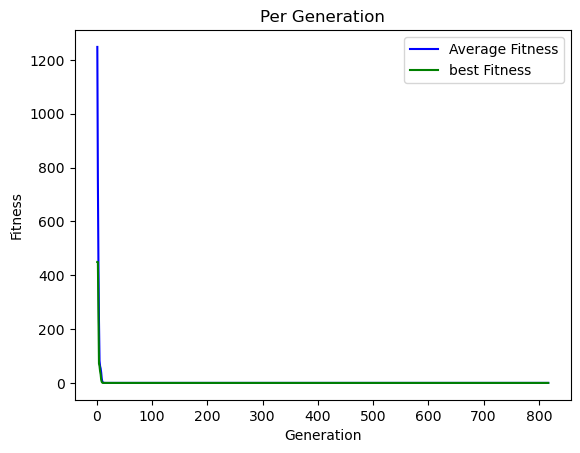

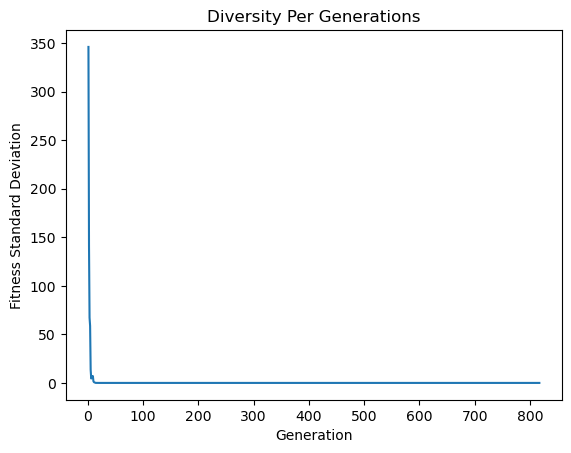

-----------------------------------------------------
this is run number:  7
Convergence Speed at Generation based on avg-fitness-values 751: 1.6309654866140035
Convergence Speed at Generation based on best-fitness-values 751: 0.9584803360659873
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874643019794, 420.9687461243017, 420.96874709667327]


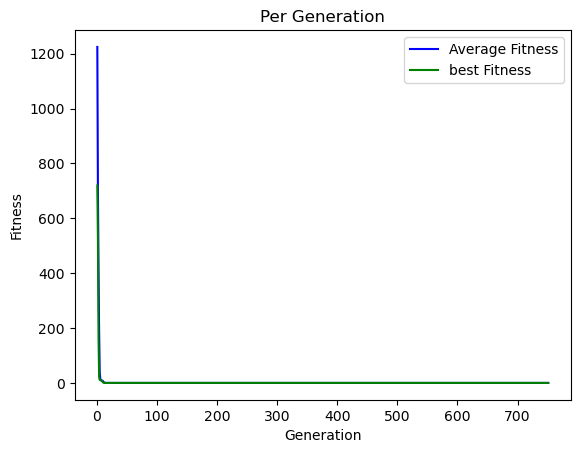

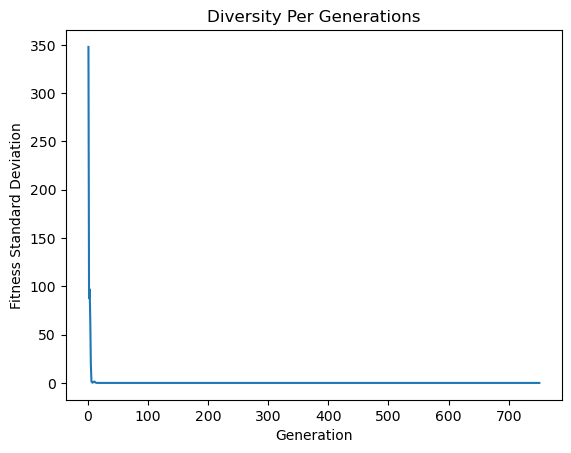

-----------------------------------------------------
this is run number:  8
Convergence Speed at Generation based on avg-fitness-values 1000: 1.215299685810754
Convergence Speed at Generation based on best-fitness-values 1000: 0.5711893711539787
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874607269, 420.96874577928537, 420.96874615686426]


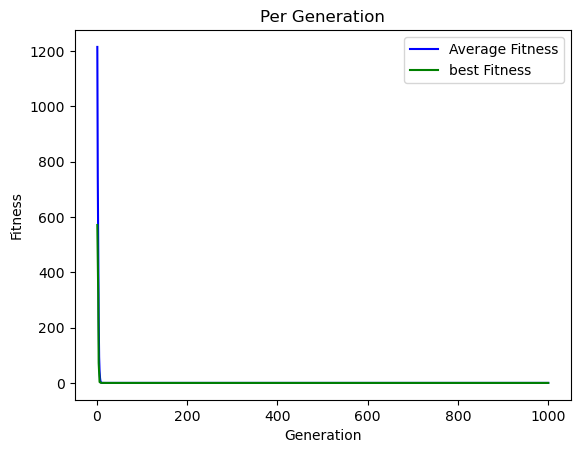

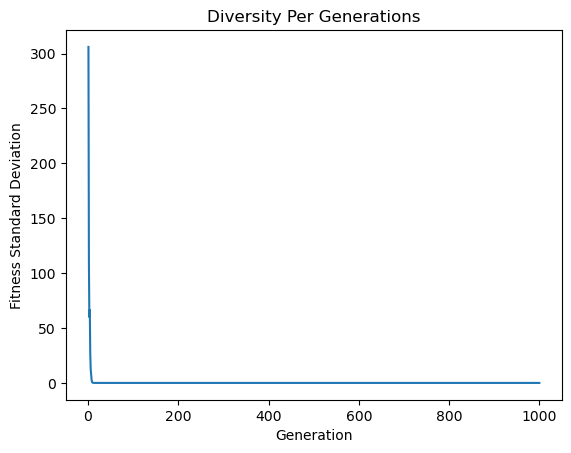

-----------------------------------------------------
this is run number:  9
Convergence Speed at Generation based on avg-fitness-values 699: 1.6710656554966494
Convergence Speed at Generation based on best-fitness-values 699: 0.8898750200599996
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874604426347, 420.9687474960532, 420.9687466516439]


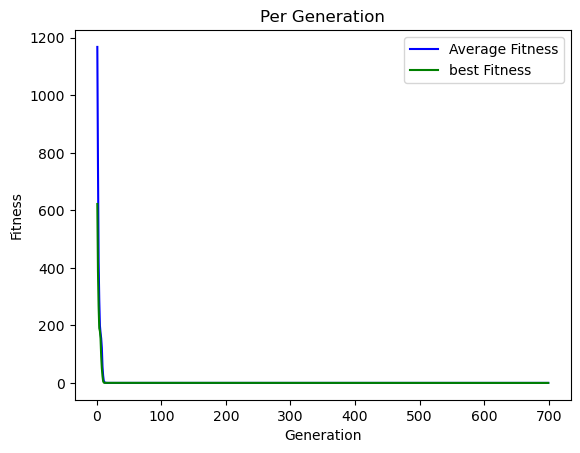

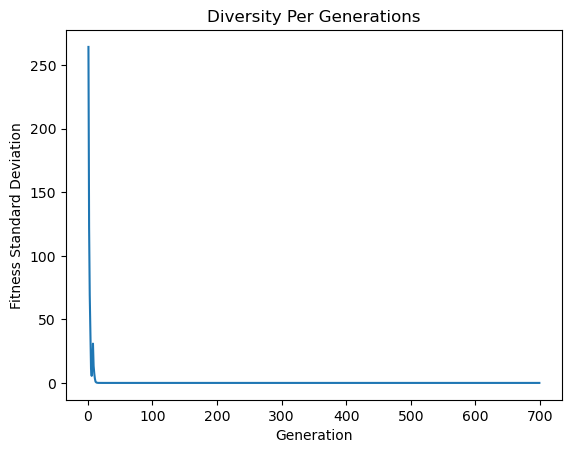

-----------------------------------------------------
this is run number:  10
Convergence Speed at Generation based on avg-fitness-values 625: 1.9414862402560782
Convergence Speed at Generation based on best-fitness-values 625: 0.8768947550284287
solution fitness:  3.818269874500402e-05
solution fitness:  [420.96874574638684, 420.9687465291499, 420.9687463078739]


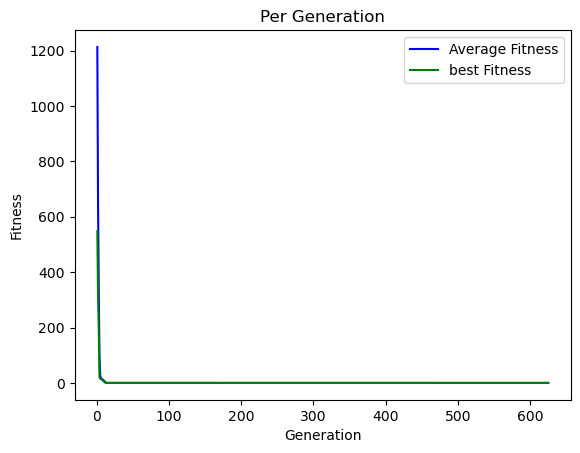

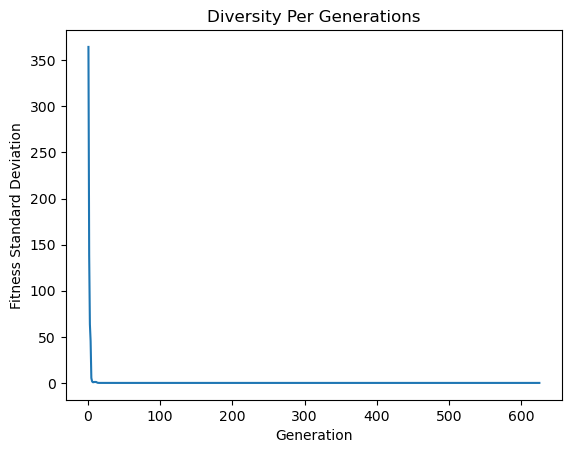

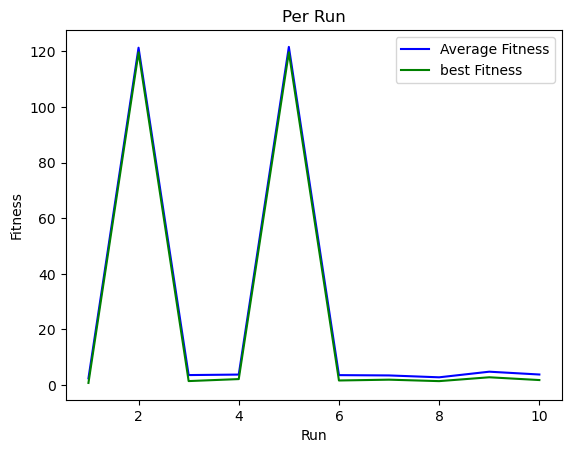

In [5]:
with open("configs/schwefel/3_adaptive_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

### n = 6

-----------------------------------------------------
this is run number:  1
Convergence Speed at Generation based on avg-fitness-values 1000: 2.466089661706157
Convergence Speed at Generation based on best-fitness-values 1000: 1.0969128131968227
solution fitness:  118.43841097983704
solution fitness:  [420.96874672625296, 420.9687474180145, 420.96874520206967, 420.96874541164567, -302.52493636226177, 420.9687437728391]


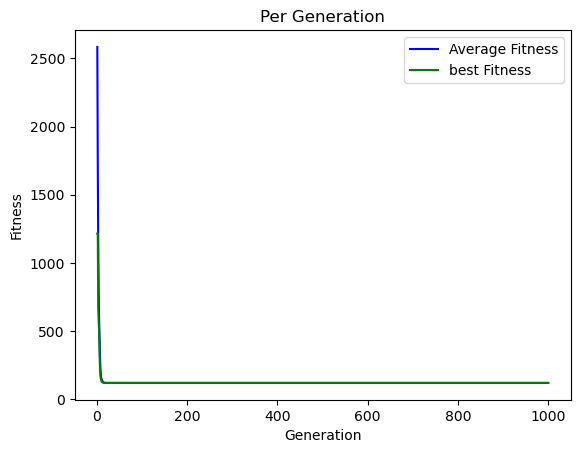

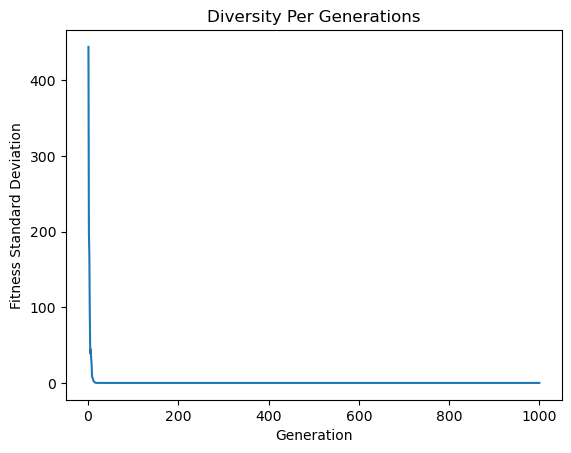

-----------------------------------------------------
this is run number:  2
Convergence Speed at Generation based on avg-fitness-values 1000: 2.4814492922419493
Convergence Speed at Generation based on best-fitness-values 1000: 1.1860656791359903
solution fitness:  7.636539930899744e-05
solution fitness:  [420.96874572230547, 420.96874579231263, 420.9687479571145, 420.96874294402636, 420.9687456280785, 420.9687465578279]


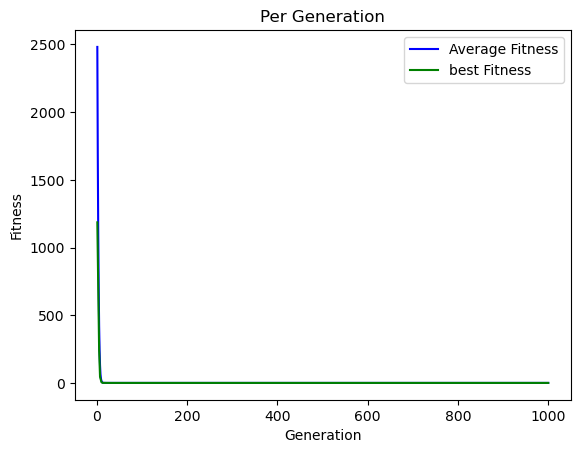

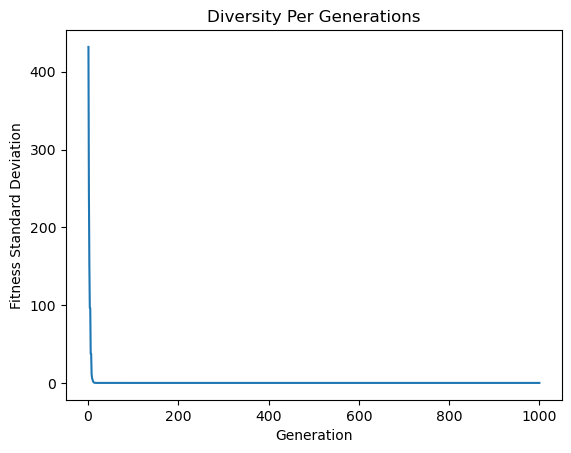

-----------------------------------------------------
this is run number:  3
Convergence Speed at Generation based on avg-fitness-values 1000: 2.4786283819393473
Convergence Speed at Generation based on best-fitness-values 1000: 1.4035911614686665
solution fitness:  7.636539794475539e-05
solution fitness:  [420.9687480566524, 420.9687457689426, 420.96874679336906, 420.9687450177307, 420.968747063871, 420.9687455272817]


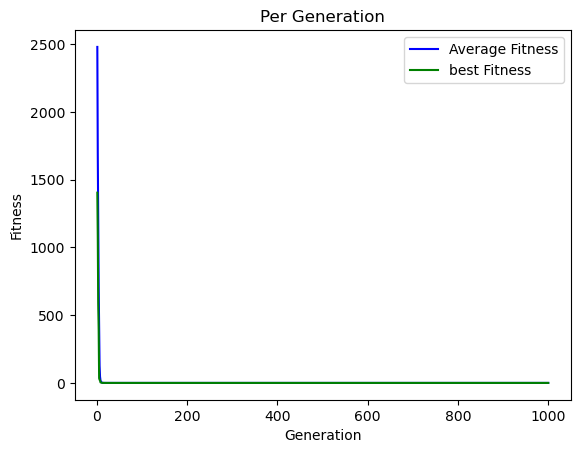

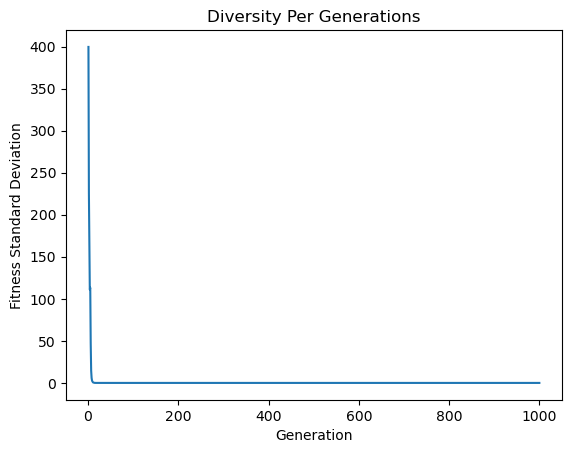

-----------------------------------------------------
this is run number:  4
Convergence Speed at Generation based on avg-fitness-values 1000: 2.5484697569533608
Convergence Speed at Generation based on best-fitness-values 1000: 1.4561910672918106
solution fitness:  7.636539839950274e-05
solution fitness:  [420.96874602595915, 420.9687476460789, 420.96874767743685, 420.9687461879968, 420.968745312597, 420.96874758077826]


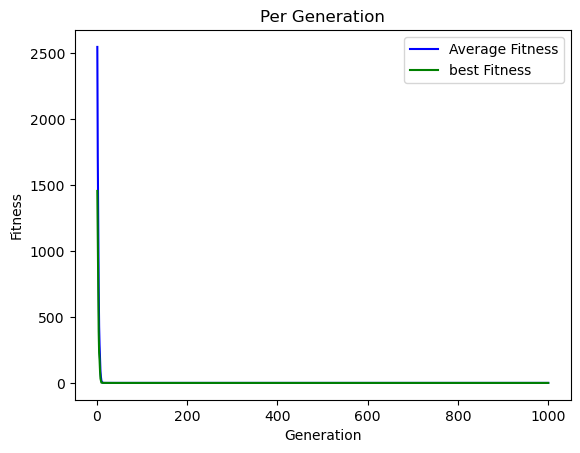

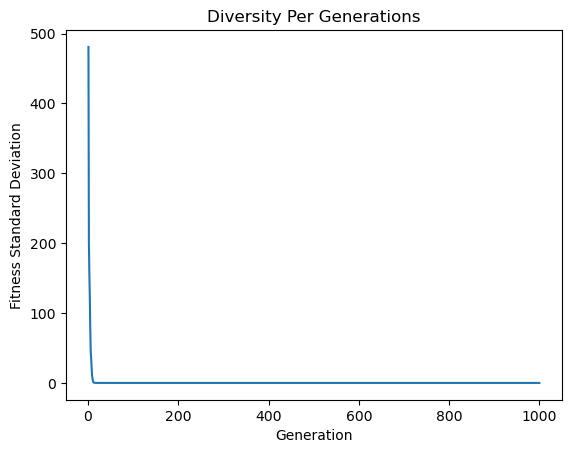

-----------------------------------------------------
this is run number:  5
Convergence Speed at Generation based on avg-fitness-values 1000: 2.479403922425894
Convergence Speed at Generation based on best-fitness-values 1000: 1.361564713280036
solution fitness:  7.636539794475539e-05
solution fitness:  [420.96874554817794, 420.9687470092362, 420.96874615520665, 420.9687475464561, 420.9687475347923, 420.96874680276846]


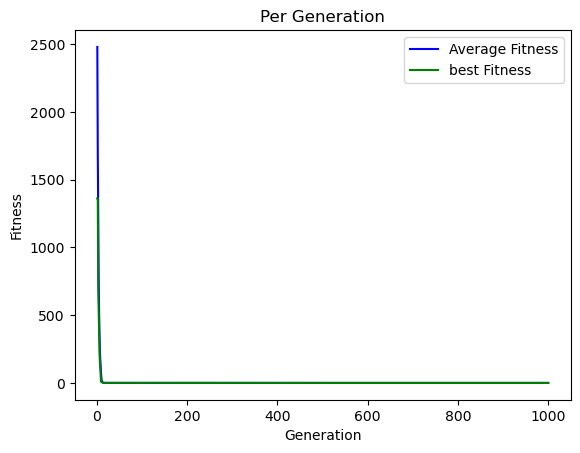

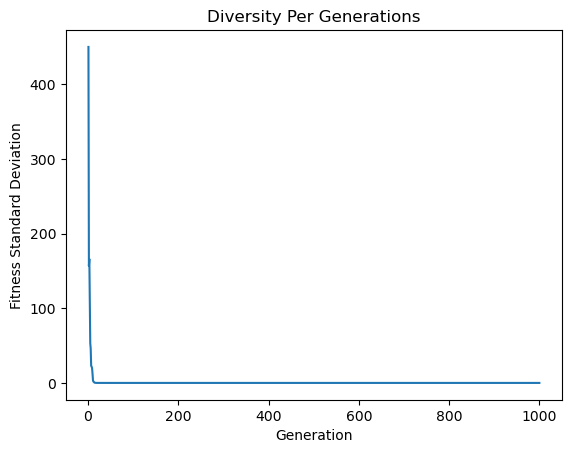

-----------------------------------------------------
this is run number:  6
Convergence Speed at Generation based on avg-fitness-values 1000: 2.515126530893431
Convergence Speed at Generation based on best-fitness-values 1000: 1.7959661477850348
solution fitness:  7.636539839950274e-05
solution fitness:  [420.96874513260485, 420.96874616489043, 420.96874683267254, 420.96874624399027, 420.9687461351604, 420.9687440574733]


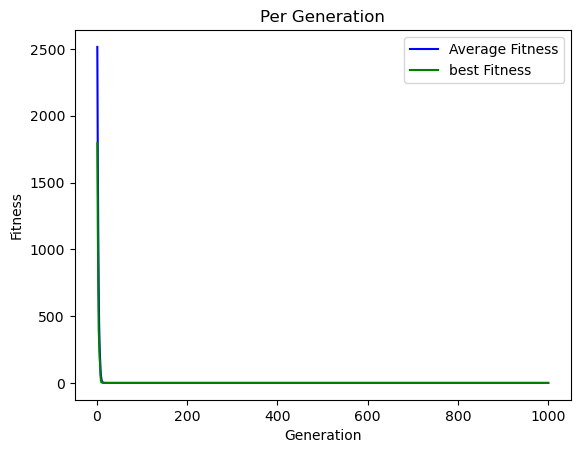

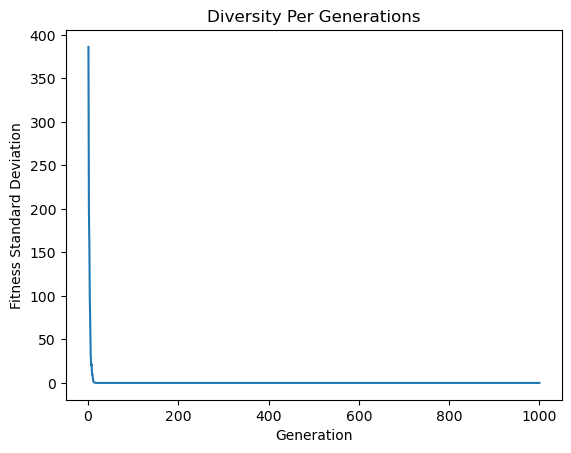

-----------------------------------------------------
this is run number:  7
Convergence Speed at Generation based on avg-fitness-values 1000: 2.5650961380847024
Convergence Speed at Generation based on best-fitness-values 1000: 1.586285507729841
solution fitness:  7.636539794475539e-05
solution fitness:  [420.96874558259333, 420.9687445599673, 420.9687459995308, 420.9687467380549, 420.96874526133377, 420.96874653896475]


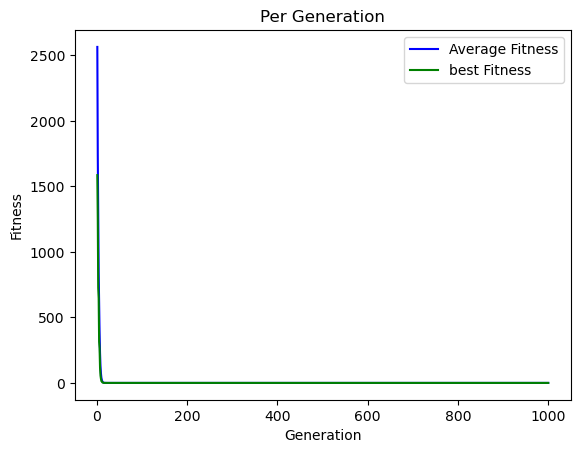

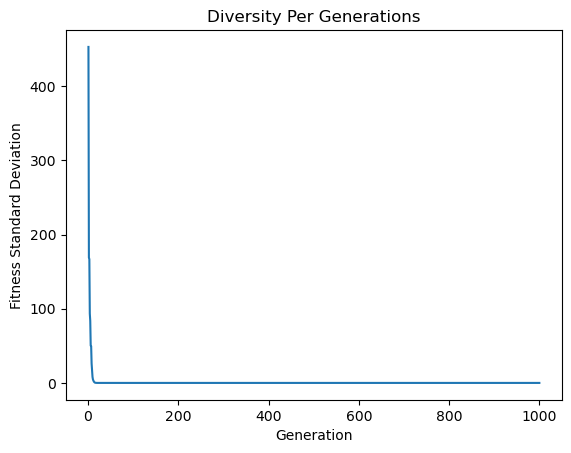

-----------------------------------------------------
this is run number:  8
Convergence Speed at Generation based on avg-fitness-values 1000: 2.4298548290179385
Convergence Speed at Generation based on best-fitness-values 1000: 1.3442174859588567
solution fitness:  118.43841097983614
solution fitness:  [420.9687470630111, 420.9687462636603, 420.9687449129427, 420.9687446959518, 420.9687474406011, -302.5249348152804]


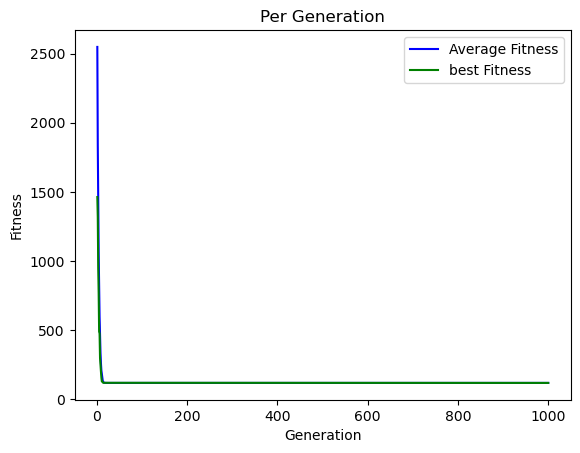

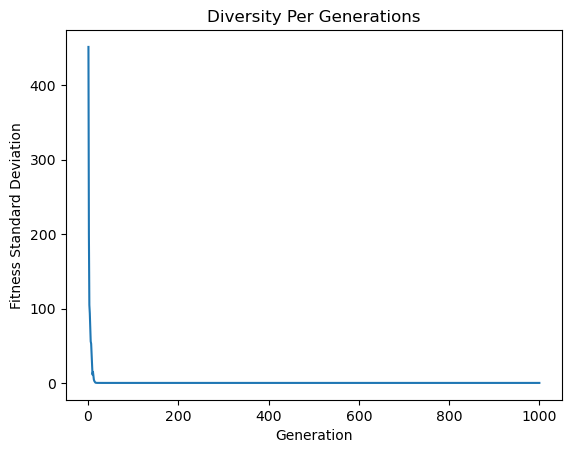

-----------------------------------------------------
this is run number:  9
Convergence Speed at Generation based on avg-fitness-values 1000: 2.72361740307037
Convergence Speed at Generation based on best-fitness-values 1000: 1.3243330674183431
solution fitness:  7.636539885425009e-05
solution fitness:  [420.96874848556524, 420.9687485513547, 420.9687464441926, 420.96874539744005, 420.9687456745289, 420.9687469265642]


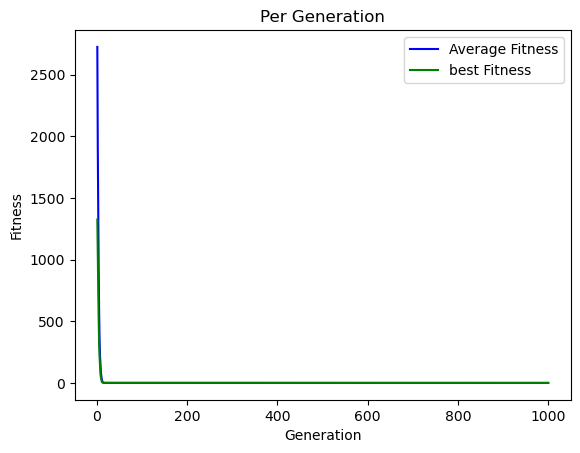

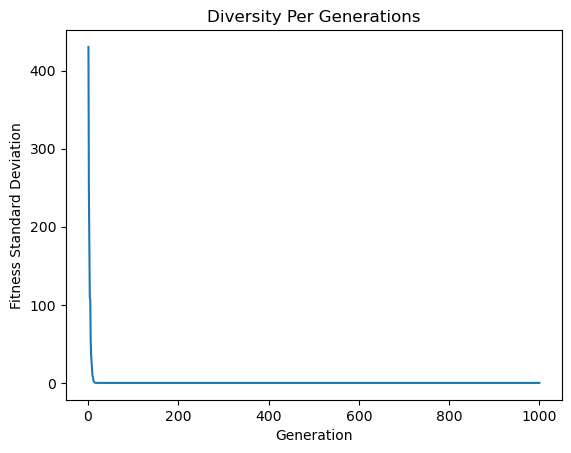

-----------------------------------------------------
this is run number:  10
Convergence Speed at Generation based on avg-fitness-values 1000: 2.505466352053329
Convergence Speed at Generation based on best-fitness-values 1000: 1.4849908418851792
solution fitness:  7.636539794475539e-05
solution fitness:  [420.9687454807723, 420.9687453815384, 420.968744813354, 420.96874624876006, 420.9687459439583, 420.96874661436084]


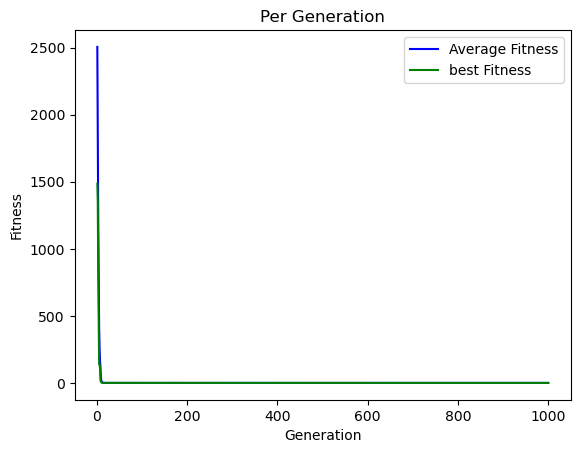

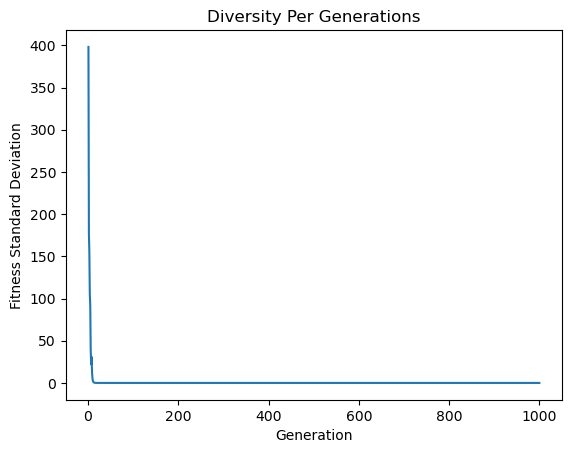

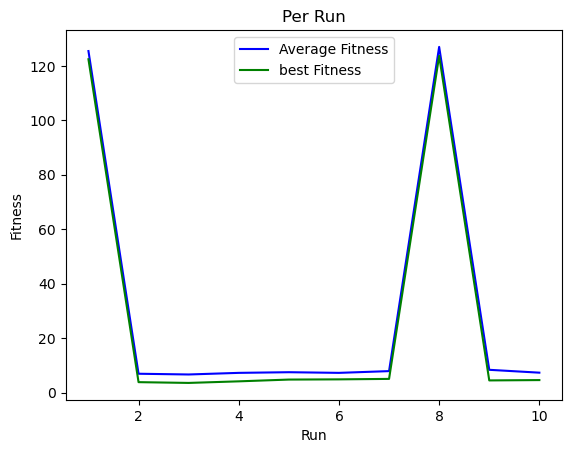

In [6]:
with open("configs/schwefel/6_adaptive_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

# generational

-----------------------------------------------------
this is run number:  1
Convergence Speed at Generation based on avg-fitness-values 1000: 2.568429086578526
Convergence Speed at Generation based on best-fitness-values 1000: 1.6105295634356
solution fitness:  118.43841097985478
solution:  [-302.5249348336675, 420.9687531145998, 420.96874482546525, 420.9687484712754, 420.9687548785753, 420.9687516506051]


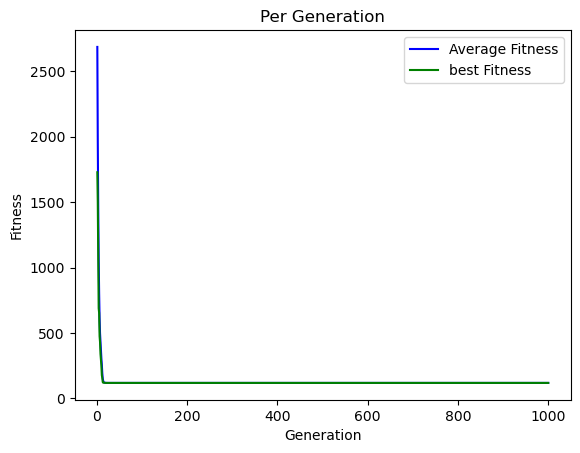

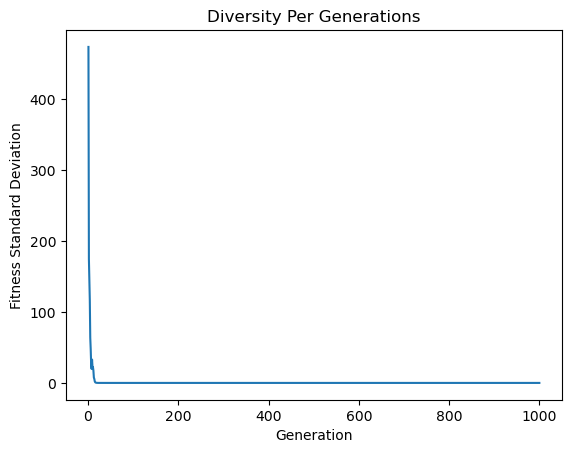

-----------------------------------------------------
this is run number:  2
Convergence Speed at Generation based on avg-fitness-values 1000: 2.2935197212696807
Convergence Speed at Generation based on best-fitness-values 1000: 1.228715782973667
solution fitness:  236.8767455942966
solution:  [420.9687502589579, 420.96874372352767, 420.9687494735208, -302.52494664210843, 420.9687518860424, -302.5249370333663]


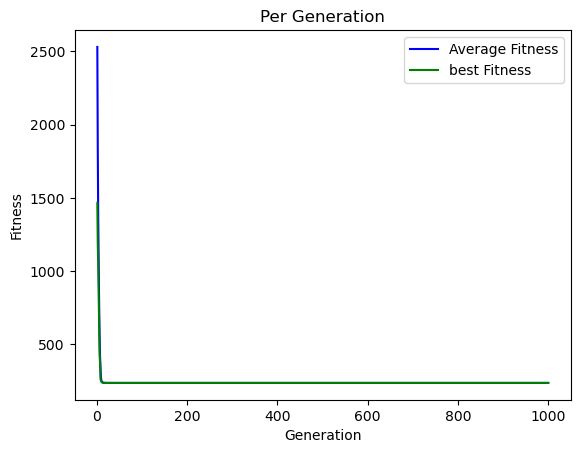

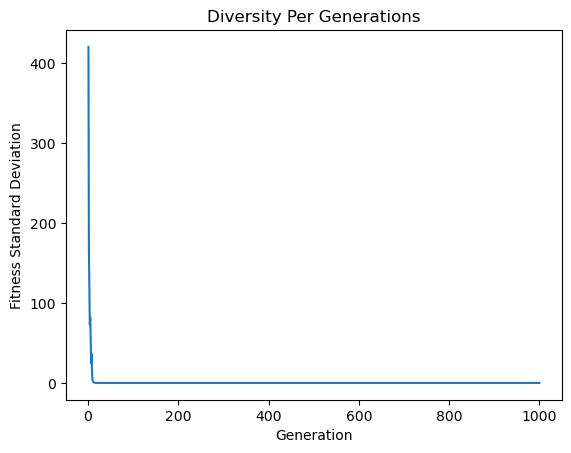

-----------------------------------------------------
this is run number:  3
Convergence Speed at Generation based on avg-fitness-values 1000: 2.444950944097995
Convergence Speed at Generation based on best-fitness-values 1000: 1.5908855342117278
solution fitness:  7.636541886313353e-05
solution:  [420.9687419214935, 420.96874037822005, 420.9687423223832, 420.9687536326283, 420.968748219551, 420.9687527723958]


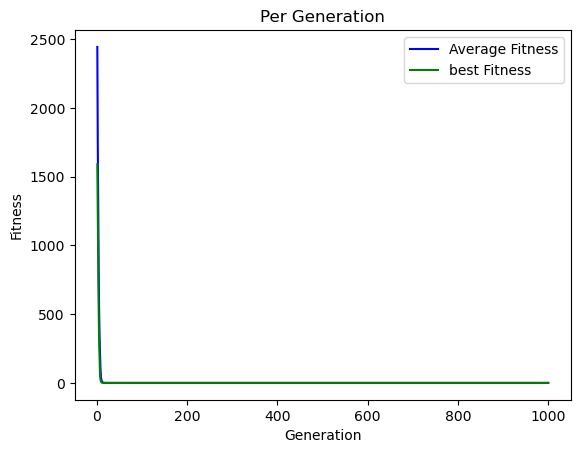

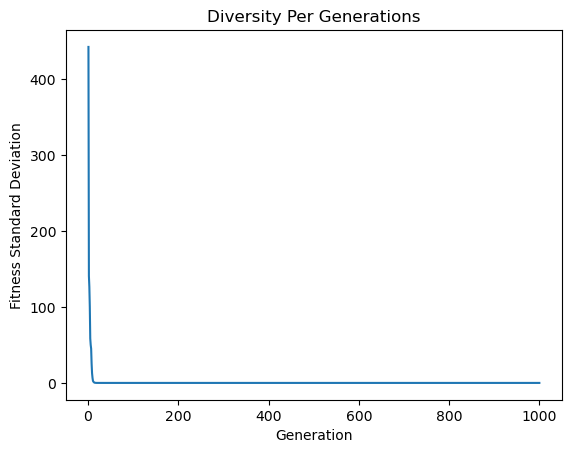

-----------------------------------------------------
this is run number:  4
Convergence Speed at Generation based on avg-fitness-values 1000: 2.5065568170599866
Convergence Speed at Generation based on best-fitness-values 1000: 1.7866587580450677
solution fitness:  7.636541795363883e-05
solution:  [420.9687498758084, 420.96874053117324, 420.9687383710151, 420.9687402020283, 420.9687436281052, 420.9687485067166]


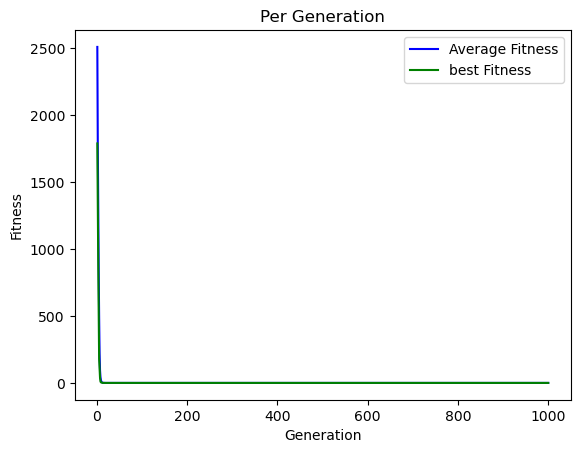

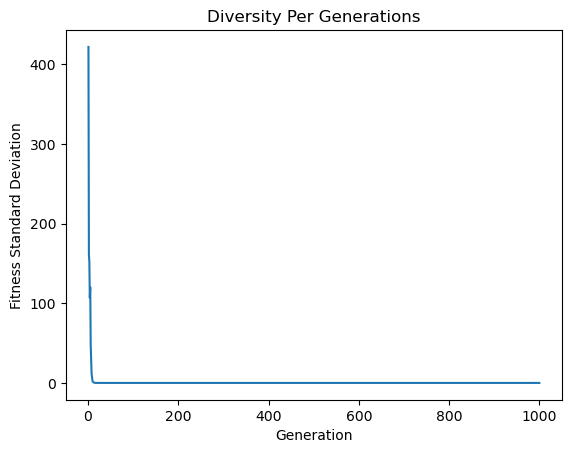

-----------------------------------------------------
this is run number:  5
Convergence Speed at Generation based on avg-fitness-values 1000: 2.4513786204658334
Convergence Speed at Generation based on best-fitness-values 1000: 1.5958439131844644
solution fitness:  7.636541249667061e-05
solution:  [420.9687412599331, 420.96874752624205, 420.96875471756243, 420.9687497575297, 420.9687462334673, 420.9687432830618]


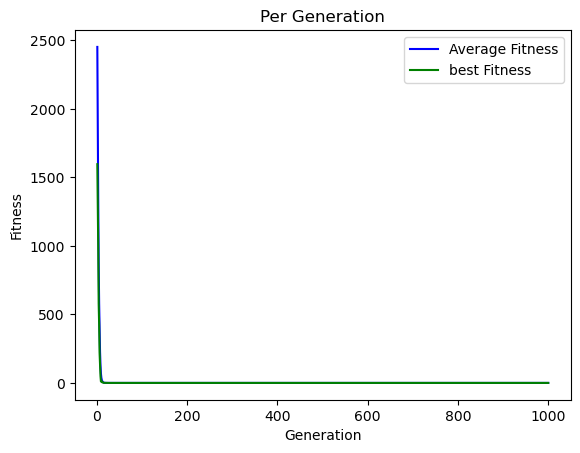

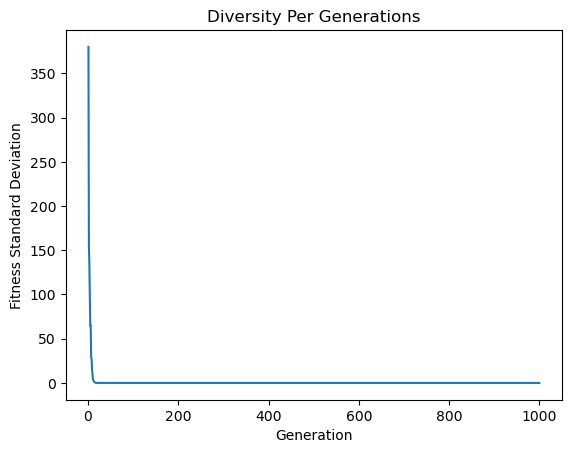

-----------------------------------------------------
this is run number:  6
Convergence Speed at Generation based on avg-fitness-values 1000: 2.397788716789569
Convergence Speed at Generation based on best-fitness-values 1000: 0.7393235033002029
solution fitness:  7.636541704414412e-05
solution:  [420.96873907970644, 420.9687420607985, 420.96875320078675, 420.9687420482966, 420.9687456010203, 420.9687502404515]


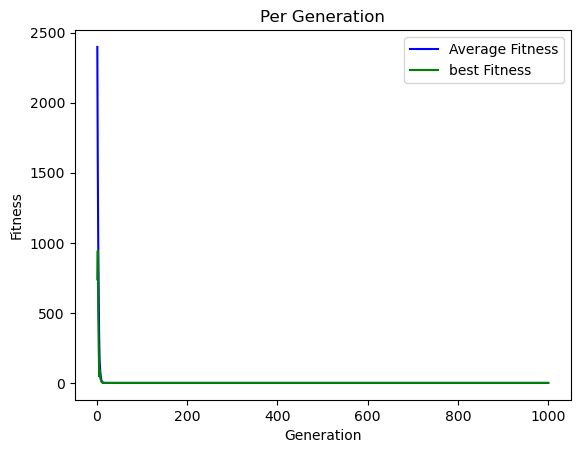

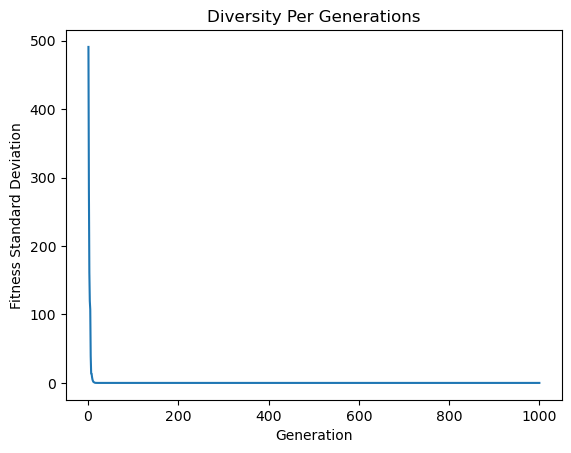

-----------------------------------------------------
this is run number:  7
Convergence Speed at Generation based on avg-fitness-values 1000: 2.5636722184765457
Convergence Speed at Generation based on best-fitness-values 1000: 1.6268009097074345
solution fitness:  7.636541613464942e-05
solution:  [420.968750196889, 420.9687482844552, 420.9687424578222, 420.9687395975505, 420.96875439615764, 420.9687455333788]


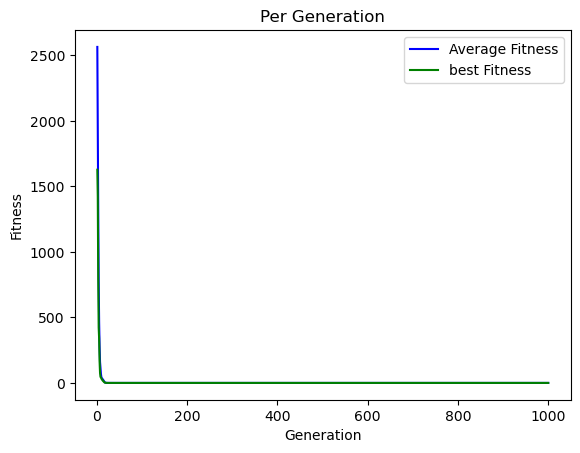

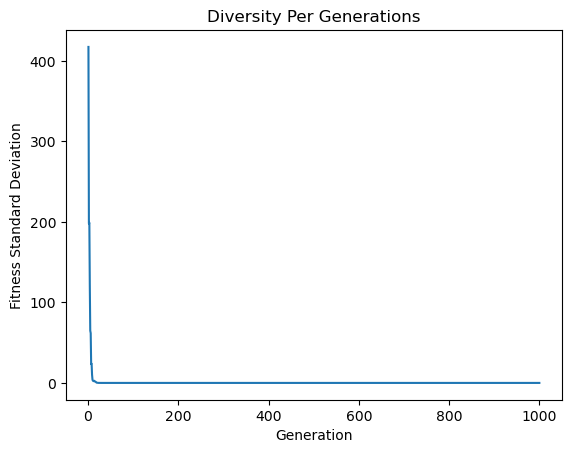

-----------------------------------------------------
this is run number:  8
Convergence Speed at Generation based on avg-fitness-values 1000: 2.4854628478986207
Convergence Speed at Generation based on best-fitness-values 1000: 1.3599307633737976
solution fitness:  118.43841097985478
solution:  [420.9687430343286, 420.9687507867901, 420.9687528354138, -302.524937373508, 420.9687533692117, 420.9687513444052]


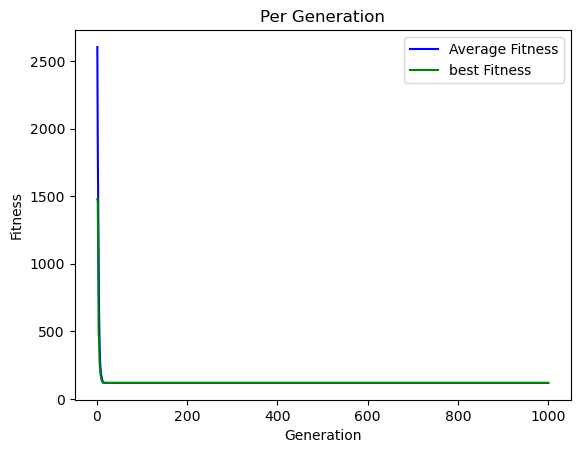

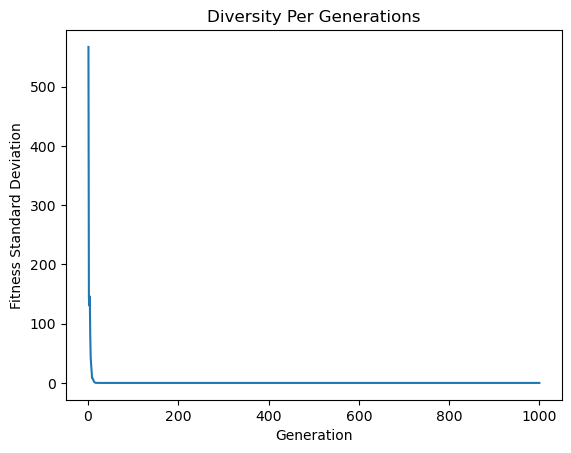

-----------------------------------------------------
this is run number:  9
Convergence Speed at Generation based on avg-fitness-values 1000: 2.4326262526474958
Convergence Speed at Generation based on best-fitness-values 1000: 1.6140463136049434
solution fitness:  118.43841097984387
solution:  [420.96874820940695, 420.96874389701986, -302.52493471105225, 420.9687481923822, 420.9687393762408, 420.96874426244113]


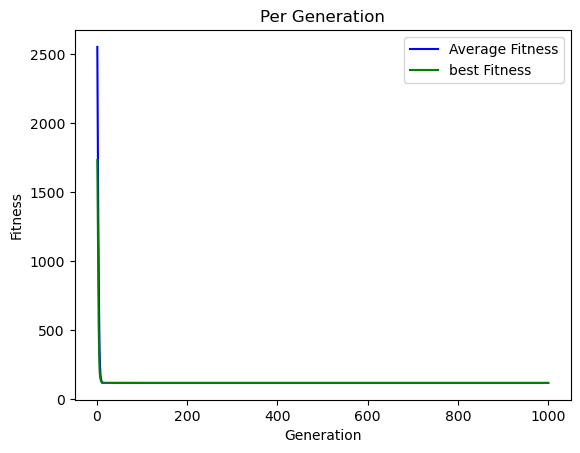

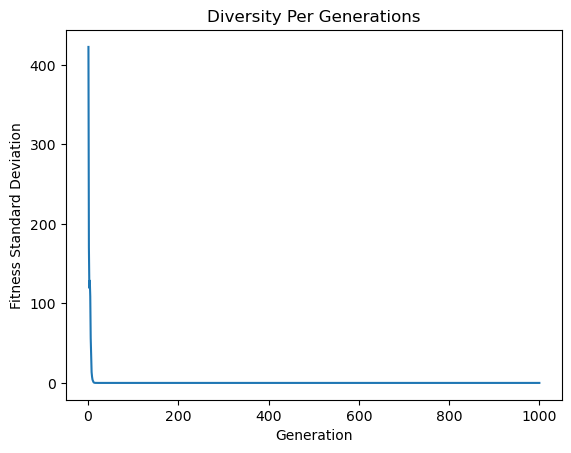

-----------------------------------------------------
this is run number:  10
Convergence Speed at Generation based on avg-fitness-values 1000: 2.412155654513821
Convergence Speed at Generation based on best-fitness-values 1000: 1.5325464017665522
solution fitness:  7.636541840838618e-05
solution:  [420.96874634862263, 420.9687407016861, 420.96875033421395, 420.96874771314344, 420.96874276466247, 420.9687363408263]


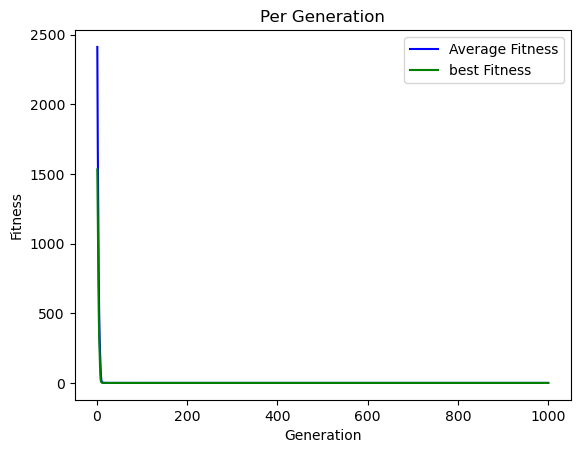

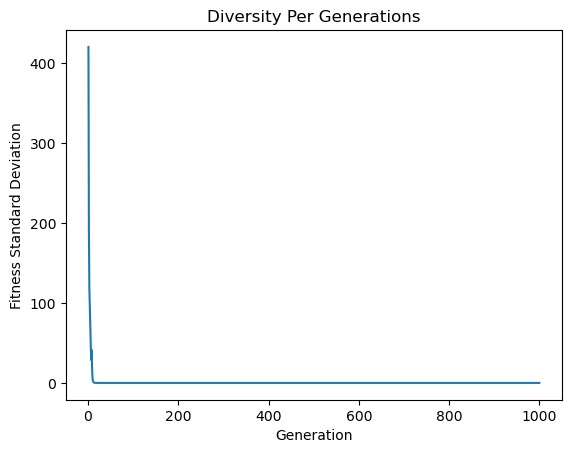

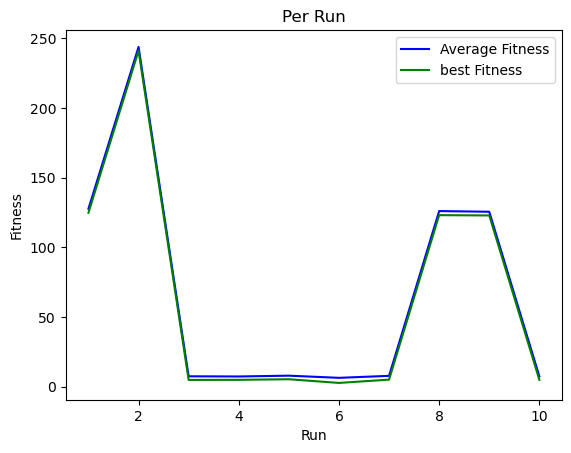

In [13]:
with open("configs/schwefel/generational_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

# self adaptive mutation is disabled

-----------------------------------------------------
this is run number:  1
solution fitness:  149.47444879157683
solution fitness:  [-300.20300337888557, 433.3607247589106, 424.93969350519984, 422.8042755538003, 426.394291886784, 427.19897919376785]


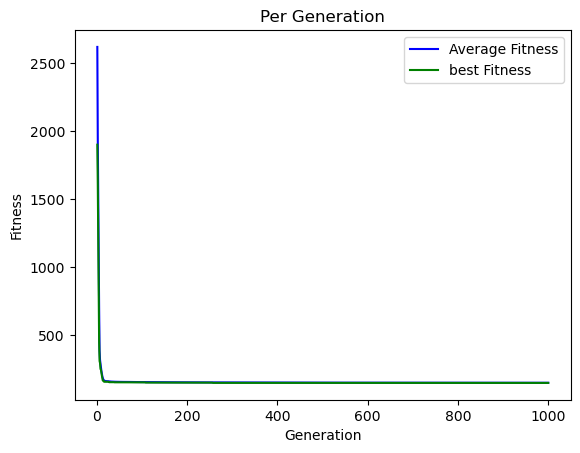

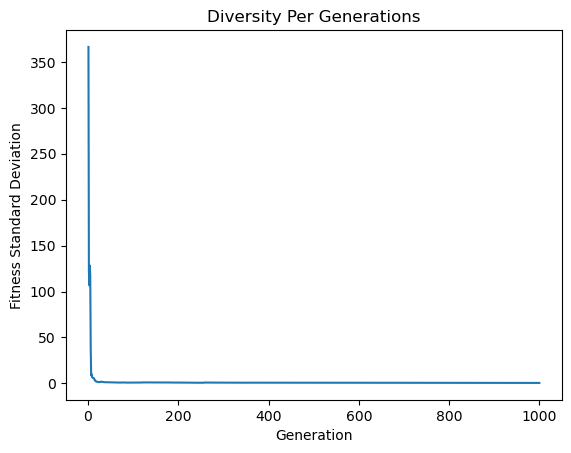

-----------------------------------------------------
this is run number:  2
solution fitness:  252.71313512735924
solution fitness:  [422.3854400074346, 431.4603309130061, 422.9735863421345, 421.97098421122826, -301.2997864570982, -299.872018360398]


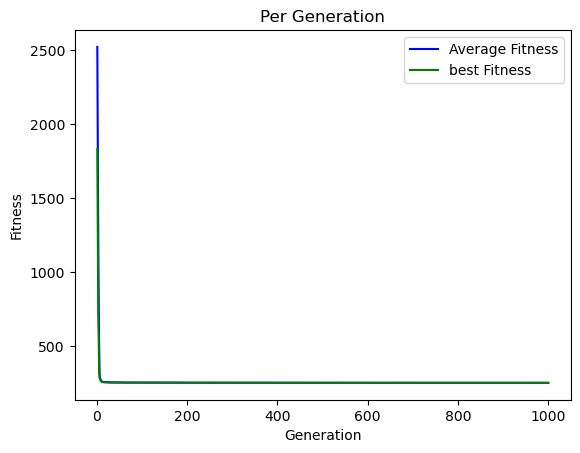

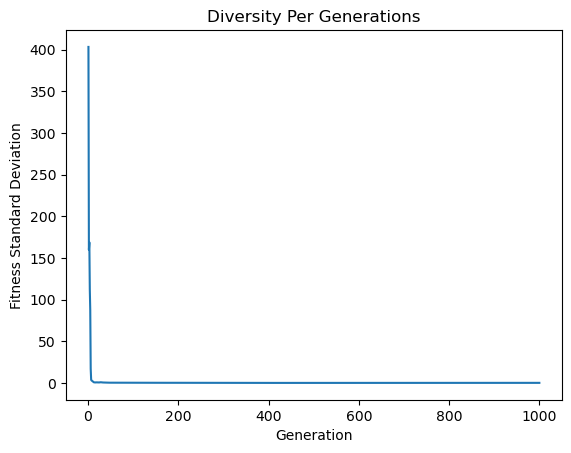

-----------------------------------------------------
this is run number:  3
solution fitness:  21.019176256456376
solution fitness:  [420.87945247097485, 422.3329570297174, 430.4012473028727, 428.3910281294439, 421.36606376647524, 425.5006464780218]


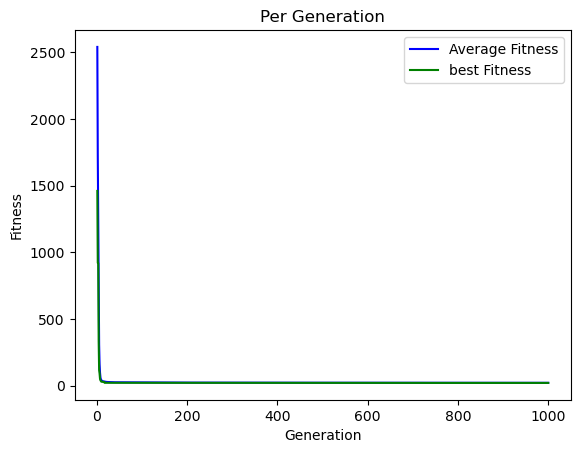

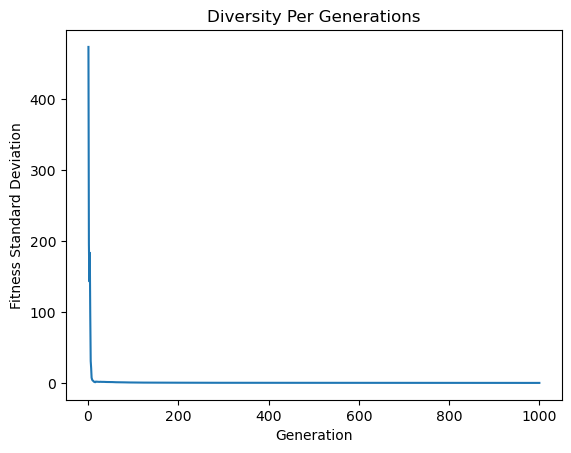

-----------------------------------------------------
this is run number:  4
solution fitness:  21.794037055768513
solution fitness:  [426.3544442039102, 423.93976167647617, 423.59962511866917, 430.266564477574, 426.2994357086894, 424.58876877450535]


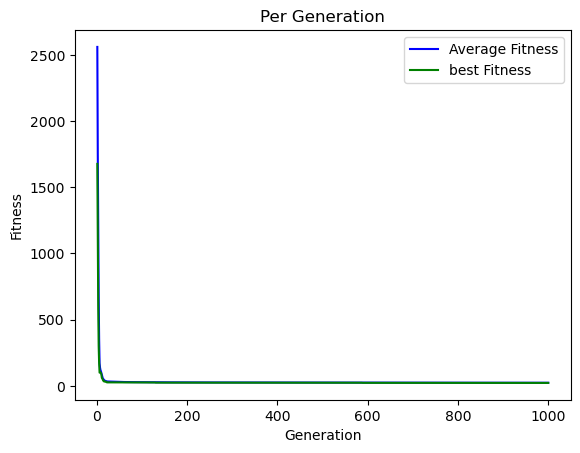

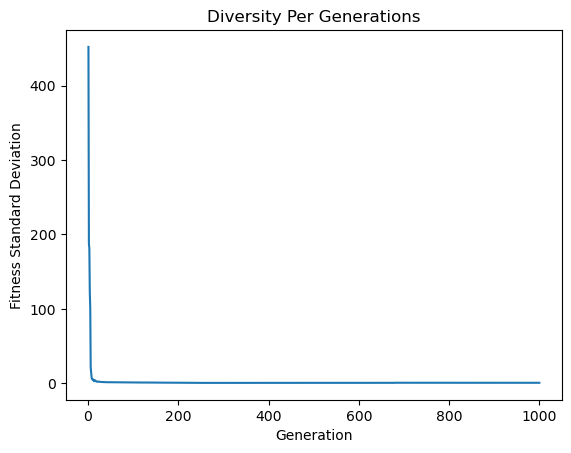

-----------------------------------------------------
this is run number:  5
solution fitness:  260.21647727483014
solution fitness:  [-289.25810448934885, 421.9489965761179, 424.22351722502793, -302.2800763768157, 420.6751806930736, 420.7540577892769]


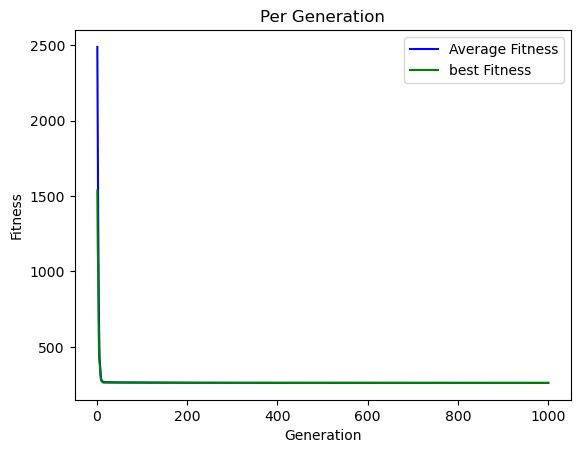

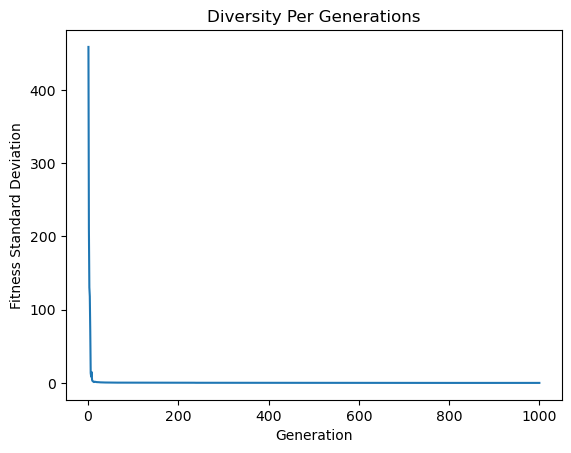

-----------------------------------------------------
this is run number:  6
solution fitness:  14.688776663221688
solution fitness:  [424.2668553850888, 427.8856311324139, 423.70053762499987, 422.8534787737026, 422.8713615819177, 427.52666686209756]


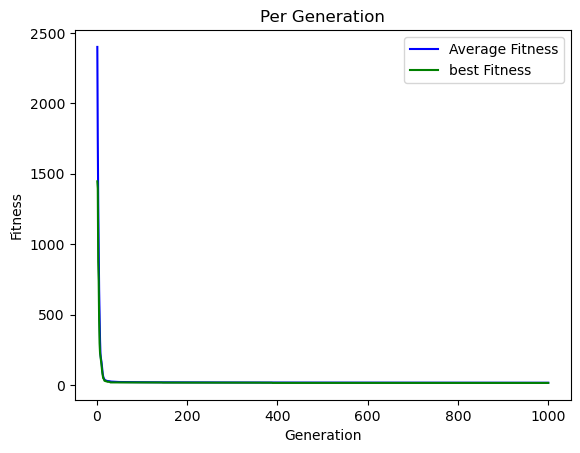

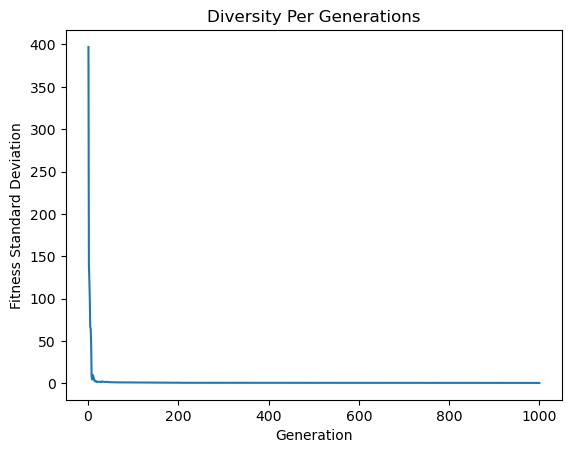

-----------------------------------------------------
this is run number:  7
solution fitness:  243.3661126235079
solution fitness:  [-296.1070832555778, 423.0603779968803, 443.24715167629756, 430.92883487019526, 438.1630283271506, 428.95591936253874]


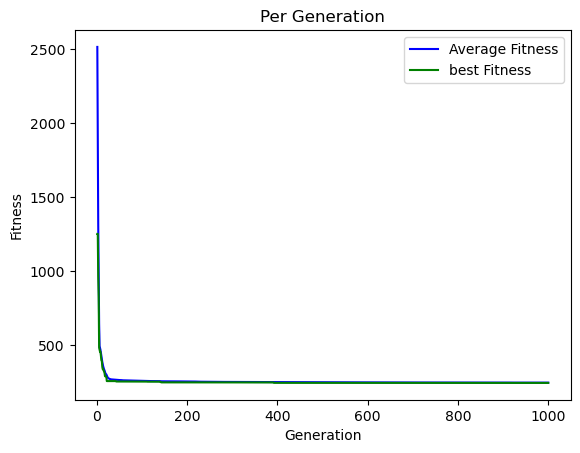

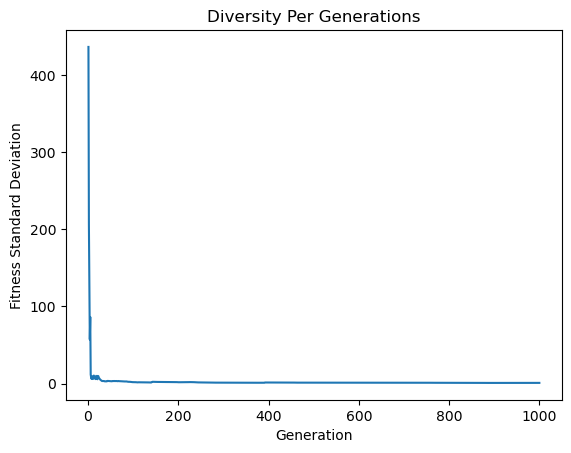

-----------------------------------------------------
this is run number:  8
solution fitness:  509.7053443806103
solution fitness:  [421.677166301508, 443.1872072890968, 428.37337999954207, 434.6572023081725, 205.084737658404, 462.2003141224675]


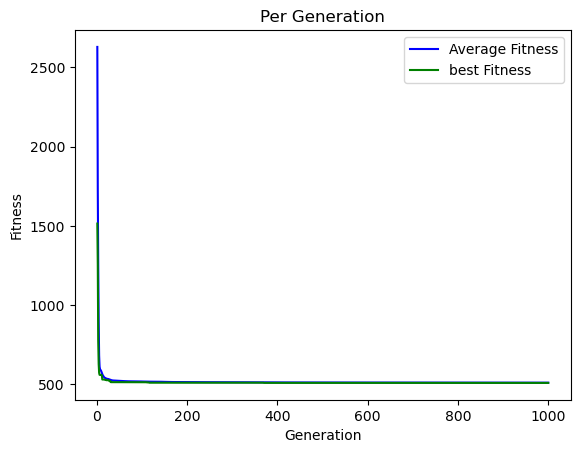

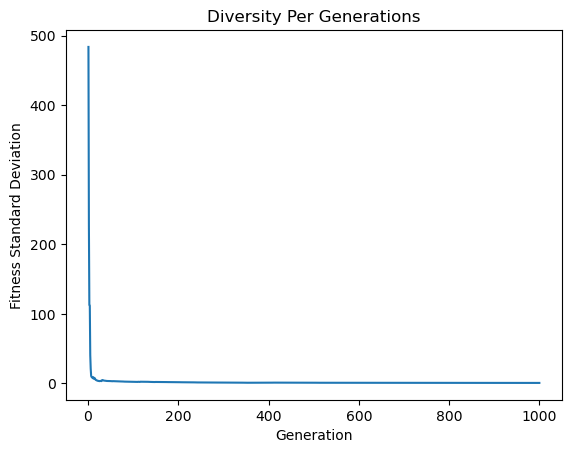

-----------------------------------------------------
this is run number:  9
solution fitness:  155.33706087505198
solution fitness:  [436.2902697831896, 423.4997839771946, 423.1182579194153, 440.06758108831195, 446.1872117851311, 422.8251654847006]


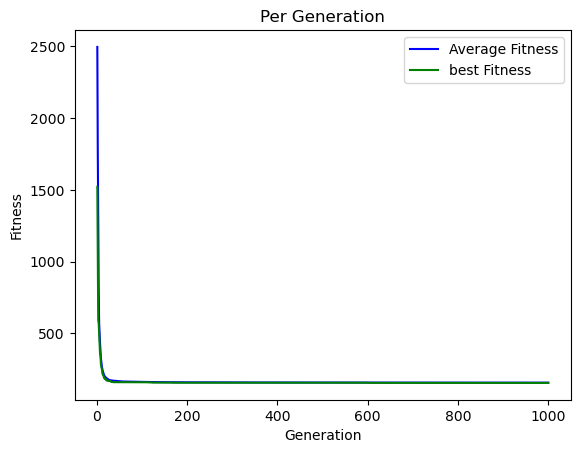

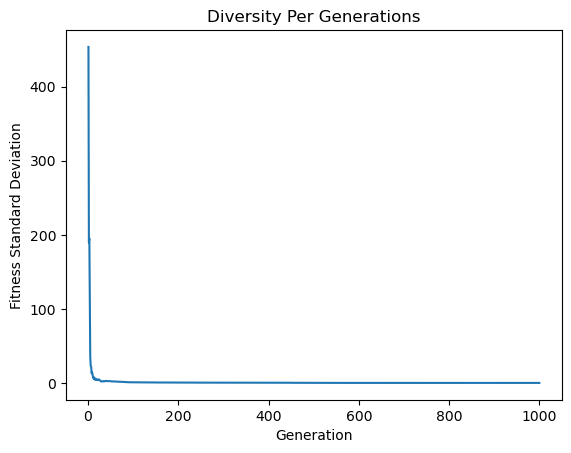

-----------------------------------------------------
this is run number:  10
solution fitness:  120.78963588972238
solution fitness:  [423.07890658370303, 429.99141987437764, 420.93172595719403, 433.46333609645905, 447.83289303993365, 424.45072803309904]


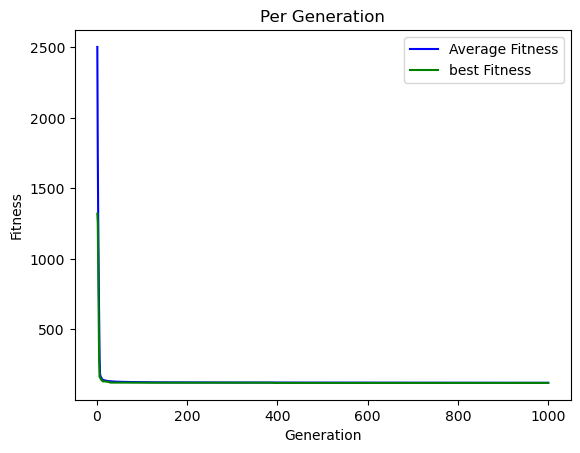

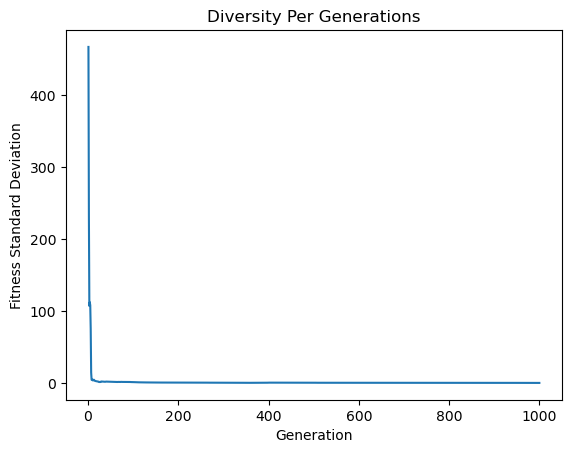

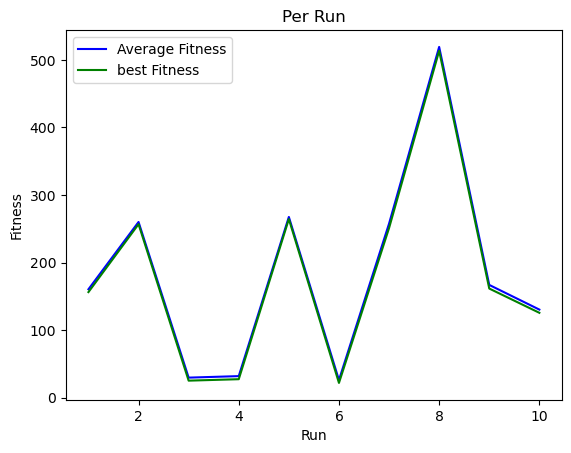

In [15]:
with open("configs/schwefel/non_adaptive_config.json", 'r') as f:
    config = json.load(f)
run_es(config,10)

# results with different num_offsprings

In [21]:
num_offspring_values = [15, 20, 40, 80, 100, 200,300, 400]
results = []

for num_offspring in num_offspring_values:
    json_string = '''
        {
        "evolutionary_strategy": {
        "survival_method": "elitism",
        "max_generations": 1000,
        "population_size": 30,
        "num_offspring": '''+ str(num_offspring) +''',

        "mutation_function_config": {
          "mutation_enable": "True",
          "mutation_probability": 0.8,
          "mean_log": 0.6,
          "sigma_log": 0.4
        },

        "sigma_config": {
          "initialization_sigma_method": "random",
          "random_sigma_range": [0,10],
          "sigma_threshold": 1e-5,
          "initial_sigma": 0.75
        },
        "convergence_threshold": 1e-7,
        "no_improvement_threshold": 300,

        "objective_function_config": {
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 3
        }
      }
    }'''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)

Convergence Speed at Generation based on avg-fitness-values 1000: 1.2882292874509518
Convergence Speed at Generation based on best-fitness-values 1000: 0.7432998678707897
Convergence Speed at Generation based on avg-fitness-values 1000: 1.1156912443252867
Convergence Speed at Generation based on best-fitness-values 1000: 0.5453472220440243
Convergence Speed at Generation based on avg-fitness-values 1000: 1.165767128354384
Convergence Speed at Generation based on best-fitness-values 1000: 0.3848223515911552
Convergence Speed at Generation based on avg-fitness-values 1000: 1.2889852668767414
Convergence Speed at Generation based on best-fitness-values 1000: 0.6031643931367102
Convergence Speed at Generation based on avg-fitness-values 961: 1.3091592731050752
Convergence Speed at Generation based on best-fitness-values 961: 0.8601114605795129
Convergence Speed at Generation based on avg-fitness-values 889: 1.3034115398209543
Convergence Speed at Generation based on best-fitness-values 889

minimum fitness: 3.818269874500402e-05
num_offspring of the minimum fitness: 80


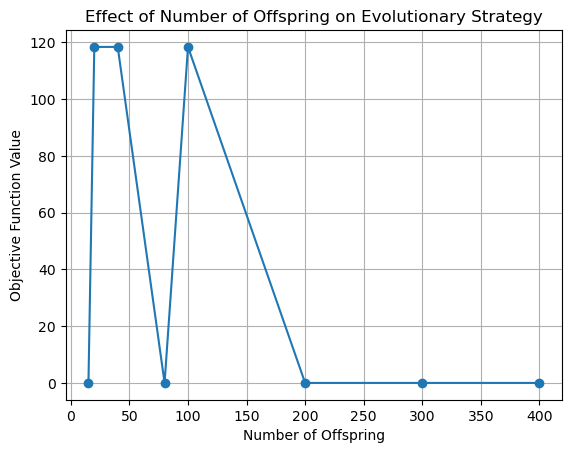

In [22]:
min_fitnesses = [result[0] for result in results]
argmin_index = min(range(len(min_fitnesses)), key=min_fitnesses.__getitem__)
print("minimum fitness:", min_fitnesses[argmin_index])
print("num_offspring of the minimum fitness:", num_offspring_values[argmin_index])
plt.plot(num_offspring_values, min_fitnesses, marker='o')
plt.xlabel('Number of Offspring')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Offspring on Evolutionary Strategy')
plt.grid(True)
plt.show()

# results with different initial_sigma

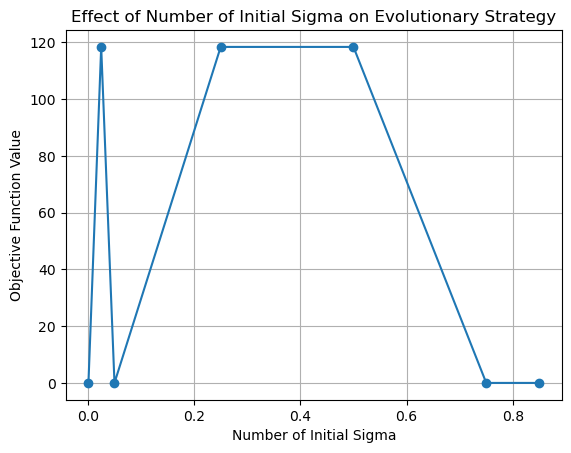

In [4]:
initial_sigma_values = [0.001, 0.025, 0.05, 0.25, 0.5,0.75, 0.85]
results = []
for initial_sigma in initial_sigma_values:
    json_string =  '''
    {
      "evolutionary_strategy": {
        "survival_method": "elitism",
        "max_generations": 1000,
        "population_size": 30,
        "num_offspring": 200,
        "initial_sigma": ''' + str(initial_sigma) + ''',
        "mutation_function_config": {
          "mutation_enable": "True",
          "mutation_probability": 0.8,
          "mean_log": 0.6,
          "sigma_log": 0.4
        },
        "convergence_threshold": 1e-5,
        "no_improvement_threshold": 200,
        "sigma_threshold": 1e-5,
        "objective_function_config": {
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 6
        }
      }
    }'''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)
min_fitnesses = [result[0] for result in results]
plt.plot(initial_sigma_values, min_fitnesses, marker='o')
plt.xlabel('Number of Initial Sigma')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Initial Sigma on Evolutionary Strategy')
plt.grid(True)
plt.show()

# results with different max_generations

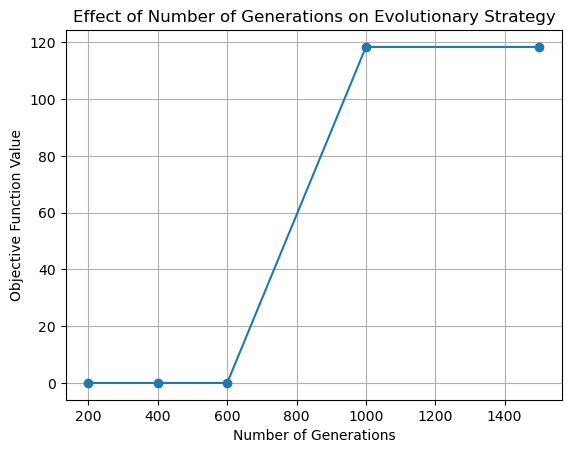

In [5]:
max_generations_values = [200, 400, 600, 1000, 1500]
results = []
for max_generations in max_generations_values:
    json_string = '''
    {
      "evolutionary_strategy": {
        "survival_method": "elitism",
        "max_generations":  ''' + str(max_generations) + ''',
        "population_size": 30,
        "num_offspring": 200,
        "initial_sigma": 0.75,
        "mutation_function_config": {
          "mutation_enable": "True",
          "mutation_probability": 0.8,
          "mean_log": 0.6,
          "sigma_log": 0.4
        },
        "convergence_threshold": 1e-5,
        "no_improvement_threshold": 200,
        "sigma_threshold": 1e-5,
        "objective_function_config": {
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 6
        }
      }
    }'''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)
min_fitnesses = [result[0] for result in results]
plt.plot(max_generations_values, min_fitnesses, marker='o')
plt.xlabel('Number of Generations')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Generations on Evolutionary Strategy')
plt.grid(True)
plt.show()

# results with different survival selection

In [26]:
survival_method_values = ["elitism", "elitism", "elitism", "elitism", "generational" ,"generational", "generational", "generational",]
results = []
for survival_method in survival_method_values:
    json_string = '''
    {
      "evolutionary_strategy": {
        "survival_method": "''' + str(survival_method) + '''",
        "max_generations":  1000,
        "population_size": 30,
        "num_offspring": 200,
        "initial_sigma": 0.75,
        "mutation_function_config": {
          "mutation_enable": "True",
          "mutation_probability": 0.8,
          "mean_log": 0.6,
          "sigma_log": 0.4
        },
        "convergence_threshold": 1e-5,
        "no_improvement_threshold": 200,
        "sigma_threshold": 1e-5,
        "objective_function_config": {
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 6
        }
      }
    }'''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)
    

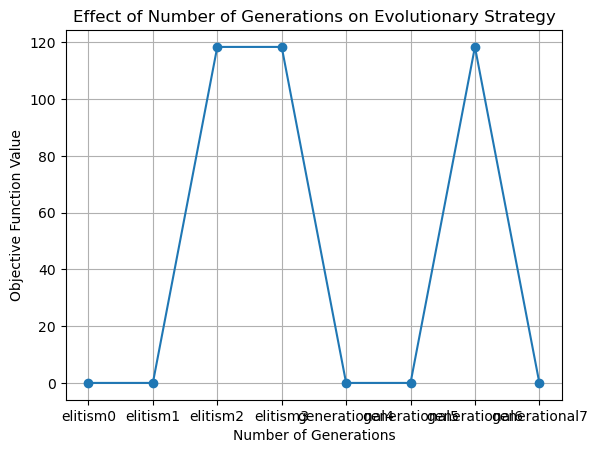

In [27]:
methods = []
for i,method in enumerate(survival_method_values):
    methods.append(method + str(i))
min_fitnesses = [result[0] for result in results]
plt.plot(methods, min_fitnesses, marker='o')
plt.xlabel('Number of Generations')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Generations on Evolutionary Strategy')
plt.grid(True)
plt.show()